# Problem Definition

A game developer company want to create a new game that would sell well, but they still don't know what genre, which platform the game should they focused on, and also should they bother the game score to make the game sell well.

# EDA Goals

1. Find the genre and platform that have highest sales figure.
2. Find correlation between sales figure and critic score.

# Descriptive Analysis

# Import Function

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [3]:
df = pd.read_csv('gamesales.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

# Data Cleaning

In [5]:
#checked the latest data

df.sort_values(by=['Year_of_Release'], ascending=False)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16385,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16376,PDC World Championship Darts 2008,PSP,NaN,Sports,Oxygen Interactive,0.01,0.0,0.00,0.00,0.01,43.0,7.0,tbd,NaN,Oxygen Interactive,E10+
16409,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.0,0.00,0.00,0.01,69.0,14.0,6.5,6.0,Midway,T
16452,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.0,0.00,0.00,0.01,59.0,6.0,6.7,107.0,Saber Interactive,M
16462,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.0,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#turned out that data after 2017 only consists of 4 datas, so I decided to drop them

df_filtered = df[df['Year_of_Release'] < 2017] 

In [7]:
#and in this data exploration I will just focused on Global Sales figure, so I decided to drop the regiion detailed sales figures

In [8]:
df_filtered

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_filtered.isna().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            32
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8463
Critic_Count       8463
User_Score         6607
User_Count         8983
Developer          6540
Rating             6678
dtype: int64

### Note:
#### in this EDA, I used two approaches to get the result needed:

#### - in result 1 I tried to find the highest number of sales from multiple categories (Genre and Platform) so I didn't need rating score.
#### - in result 2, I tried to find the correlation of number of sales and rating (both from Critic or User). so in this exploration, I'll drop the N/A value.

##### >check outlier values

In [10]:
df_filtered.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,7983.000000,7983.000000,7463.000000
mean,2006.484616,0.264089,0.145945,0.078479,0.047593,0.536361,68.994363,26.441313,163.015141
std,5.877050,0.818416,0.506696,0.311082,0.187994,1.558610,13.920060,19.008136,563.863327
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


in Global Sales column, the mean value for it is really low (0.54 from max value 82.53) so we have to check for the outliees.
and for the prevention, I will also check the outliers for Critic Score and User Score column.

In [11]:
#part 1 for Global Sales column
Q3 = df_filtered.describe()['Global_Sales']['75%']
Q1 = df_filtered.describe()['Global_Sales']['25%']
IQR = Q3 - Q1

In [12]:
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)
df_filtered[(df_filtered['Global_Sales'] < Lower_Fence) | (df_filtered['Global_Sales'] > Upper_Fence)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,WWE SmackDown vs. Raw 2011,PS3,2010.0,Fighting,THQ,0.44,0.46,0.01,0.18,1.09,74.0,42.0,6.9,41.0,Yuke's,T
1888,LEGO Star Wars III: The Clone Wars,DS,2011.0,Action,LucasArts,0.61,0.38,0.00,0.10,1.09,66.0,8.0,tbd,NaN,Traveller's Tales,E
1889,NCAA Football 13,X360,2012.0,Action,Electronic Arts,1.02,0.00,0.00,0.07,1.09,76.0,20.0,5.5,65.0,EA Tiburon,E
1890,Skate 2,X360,2009.0,Sports,Electronic Arts,0.82,0.17,0.01,0.09,1.09,84.0,70.0,8,72.0,EA Black Box,T


in Global Sales, there are 1872 outliers values, but after I rechecked it to the data sources it's not a wrong value so I decided to keep them.

In [13]:
#check outliers data
#part 2 for Critic Score column
Q3kritik = df_filtered.describe()['Critic_Score']['75%']
Q1kritik = df_filtered.describe()['Critic_Score']['25%']
IQRkritik = Q3kritik - Q3kritik
Upper_Fencekritik = Q3kritik + (1.5 * IQRkritik)
Lower_Fencekritik = Q3kritik - (1.5 * IQRkritik)
outlierkritik = df_filtered[(df_filtered['Critic_Score'] < Lower_Fencekritik) | (df_filtered['Critic_Score'] > Upper_Fencekritik)]
outlierkritik.sort_values(by=['Critic_Score'], ascending=False)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
51,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.07,0.14,1.03,11.01,98.0,86.0,7.9,2951.0,Rockstar North,M
57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.69,0.44,1.61,10.50,98.0,64.0,7.5,2833.0,Rockstar North,M
5350,SoulCalibur,DC,1999.0,Fighting,Namco Bandai Games,0.00,0.00,0.34,0.00,0.34,98.0,24.0,8.8,200.0,Namco,T
227,Tony Hawk's Pro Skater 2,PS,2000.0,Sports,Activision,3.05,1.41,0.02,0.20,4.68,98.0,19.0,7.7,299.0,Neversoft Entertainment,T
49,Super Mario Galaxy,Wii,2007.0,Platform,Nintendo,6.06,3.35,1.20,0.74,11.35,97.0,73.0,8.9,2147.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15345,Balls of Fury,Wii,2007.0,Sports,Zoo Digital Publishing,0.02,0.00,0.00,0.00,0.02,19.0,6.0,2.8,25.0,Black Lantern Studios,E10+
12823,Ride to Hell,X360,2013.0,Racing,Deep Silver,0.04,0.01,0.00,0.01,0.06,19.0,14.0,1.3,433.0,"Eutechnyx, Deep Silver",M
10016,Rugby 15,PS4,2015.0,Sports,Bigben Interactive,0.04,0.06,0.00,0.02,0.11,19.0,5.0,3.4,65.0,HB Studios Multimedia,E
10663,Leisure Suit Larry: Box Office Bust,PS3,2009.0,Adventure,Codemasters,0.06,0.03,0.00,0.01,0.10,17.0,11.0,1.7,37.0,Team 17,M


in Critic Score, there are also has outliers values, but it's stil a normal number for a Critic Score so I decided to keep them.

In [14]:
#check outliers data
#part 3 for User Score column
df_filtered['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
df_filtered.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

#### Note:
to find outliers in 'User_Score' column, but in user score, there are some games that doesn't have score, but instead they left it empty, they fill it with 'tbd' (to be done), and the column data type become 'object' or 'string because of it. so I have to manually drop it. 

so the process to clean 'User_Score' column is a little more complicated since there are also some NaN values in User Score column, butI can't just drop the NaN because I want to keep as much as possible datas for other analysis. so I will do the data cleaning for User Score column splitted below.

# Data Analysis

### part 1: Highest game sales by Platform and Genre

#### 1.1 Highest game sales by Platform

In [16]:
#select the data needed and clean the data first
dfsales = df_filtered[['Name', 'Platform', 'Genre', 'Global_Sales', 'Year_of_Release' ]]

In [17]:
dfsales.isna().sum()

Name               2
Platform           0
Genre              2
Global_Sales       0
Year_of_Release    0
dtype: int64

In [18]:
dfsalesc = dfsales.dropna()

In [19]:
dfsalesc.isna().sum()

Name               0
Platform           0
Genre              0
Global_Sales       0
Year_of_Release    0
dtype: int64

In [20]:
dfsalesc["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

According to unique variables of "Platform" it will be useful to add one more "Platform_General" colums to group some of these platform types under larger groups such PS,PS3 and PS4 under Playstation and X360,XB and Xone under Xbox categories. I expect this categorization will led me to perform comparisons between two biggest game platforms.

In [21]:
dfsalesc.loc['Platform_General'] = dfsalesc['Platform']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [22]:
dfsalesc.loc[dfsalesc['Platform'] == 'PS3', 'Platform_General'] = 'Sony_Playstation' 
dfsalesc.loc[dfsalesc['Platform'] == 'PS', 'Platform_General'] = 'Sony_Playstation' 
dfsalesc.loc[dfsalesc['Platform'] == 'PS2', 'Platform_General'] = 'Sony_Playstation'
dfsalesc.loc[dfsalesc['Platform'] == 'PS4', 'Platform_General'] = 'Sony_Playstation'
dfsalesc.loc[dfsalesc['Platform'] == 'PSP', 'Platform_General'] = 'Sony_Playstation'
dfsalesc.loc[dfsalesc['Platform'] == 'PSV', 'Platform_General'] = 'Sony_Playstation'
dfsalesc.loc[dfsalesc['Platform'] == 'Wii', 'Platform_General'] = 'Nintendo'
dfsalesc.loc[dfsalesc['Platform'] == 'DS', 'Platform_General'] = 'Nintendo'
dfsalesc.loc[dfsalesc['Platform'] == 'GBA', 'Platform_General'] = 'Nintendo'
dfsalesc.loc[dfsalesc['Platform'] == '3DS', 'Platform_General'] = 'Nintendo'
dfsalesc.loc[dfsalesc['Platform'] == 'WiiU', 'Platform_General'] = 'Nintendo'
dfsalesc.loc[dfsalesc['Platform'] == 'NES', 'Platform_General'] = 'Nintendo'
dfsalesc.loc[dfsalesc['Platform'] == 'SNES', 'Platform_General'] = 'Nintendo'
dfsalesc.loc[dfsalesc['Platform'] == 'N64', 'Platform_General'] = 'Nintendo'
dfsalesc.loc[dfsalesc['Platform'] == 'GB', 'Platform_General'] = 'Nintendo'
dfsalesc.loc[dfsalesc['Platform'] == 'GC', 'Platform_General'] = 'Nintendo'
dfsalesc.loc[dfsalesc['Platform'] == 'X360', 'Platform_General'] = 'Microsoft_Xbox'
dfsalesc.loc[dfsalesc['Platform'] == 'XB', 'Platform_General'] = 'Microsoft_Xbox'
dfsalesc.loc[dfsalesc['Platform'] == 'XOne', 'Platform_General'] = 'Microsoft_Xbox'
dfsalesc.loc[dfsalesc['Platform'] == '2600', 'Platform_General'] = 'Atari'
dfsalesc.loc[dfsalesc['Platform'] == 'DC', 'Platform_General'] = 'Sega'
dfsalesc.loc[dfsalesc['Platform'] == 'SAT', 'Platform_General'] = 'Sega'
dfsalesc.loc[dfsalesc['Platform'] == 'GEN', 'Platform_General'] = 'Sega'
dfsalesc.loc[dfsalesc['Platform'] == 'SCD', 'Platform_General'] = 'Sega'
dfsalesc.loc[dfsalesc['Platform'] == 'GG', 'Platform_General'] = 'Sega'
dfsalesc.loc[dfsalesc['Platform'] == 'WS', 'Platform_General'] = 'Bandai'
dfsalesc.loc[dfsalesc['Platform'] == 'TG16', 'Platform_General'] = 'Nec'
dfsalesc.loc[dfsalesc['Platform'] == 'PCFX', 'Platform_General'] = 'Nec'
dfsalesc.loc[dfsalesc['Platform'] == '3DO', 'Platform_General'] = 'Panasonic'
dfsalesc.loc[dfsalesc['Platform'] == 'NG', 'Platform_General'] = 'SNK Corporation'
dfsalesc.loc[dfsalesc['Platform'] == 'PC', 'Platform_General'] = 'PC'


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [23]:
dfsalesc

,Name,Platform,Genre,Global_Sales,Year_of_Release,Platform_General
0,Wii Sports,Wii,Sports,82.53,2006.0,Nintendo
1,Super Mario Bros.,NES,Platform,40.24,1985.0,Nintendo
2,Mario Kart Wii,Wii,Racing,35.52,2008.0,Nintendo
3,Wii Sports Resort,Wii,Sports,32.77,2009.0,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,31.37,1996.0,Nintendo
...,...,...,...,...,...,...
16715,LMA Manager 2007,X360,Sports,0.01,2006.0,Microsoft_Xbox
16716,Haitaka no Psychedelica,PSV,Adventure,0.01,2016.0,Sony_Playstation
16717,Spirits & Spells,GBA,Platform,0.01,2003.0,Nintendo
16718,Winning Post 8 2016,PSV,Simulation,0.01,2016.0,Sony_Playstation


In [24]:
dfsalesc["Platform_General"].unique()

array(['Nintendo', 'Microsoft_Xbox', 'Sony_Playstation', 'PC', 'Atari',
       'Sega', 'Bandai', 'SNK Corporation', 'Nec', 'Panasonic', nan],
      dtype=object)

##### A. Highest game sales by Platform all time sales

In [25]:
yearlysales = pd.pivot_table(dfsalesc, values='Global_Sales', index=['Year_of_Release', 'Platform_General'], aggfunc=np.sum)
yearlysales

Global_Sales
Year_of_Release Platform_General              
1980.0          Atari                    11.38
1981.0          Atari                    35.77
1982.0          Atari                    28.86
1983.0          Atari                     5.83
                Nintendo                 10.96
...                                        ...
2015.0          Sony_Playstation        142.18
2016.0          Microsoft_Xbox           27.79
                Nintendo                 19.90
                PC                        5.27
                Sony_Playstation         77.14

[136 rows x 1 columns]

In [204]:
yearly = pd.pivot_table(dfsalesc, values='Global_Sales', index=['Year_of_Release', 'Platform_General'], aggfunc=np.sum).reset_index()
yearly

,Year_of_Release,Platform_General,Global_Sales
0,1980.0,Atari,11.38
1,1981.0,Atari,35.77
2,1982.0,Atari,28.86
3,1983.0,Atari,5.83
4,1983.0,Nintendo,10.96
...,...,...,...
131,2015.0,Sony_Playstation,142.18
132,2016.0,Microsoft_Xbox,27.79
133,2016.0,Nintendo,19.90
134,2016.0,PC,5.27


In [26]:
yearlysales.nlargest(5, columns='Global_Sales')

,,Global_Sales
Year_of_Release,Platform_General,
2009.0,Nintendo,326.54
2008.0,Nintendo,316.90
2007.0,Nintendo,303.85
2006.0,Nintendo,273.68
2004.0,Sony_Playstation,218.89


In [27]:
totalplatform = pd.pivot_table(yearlysales, values='Global_Sales', index=['Platform_General'], aggfunc=np.sum).reset_index()
totalplatform

,Platform_General,Global_Sales
0,Atari,86.57
1,Bandai,1.42
2,Microsoft_Xbox,1372.92
3,Nec,0.19
4,Nintendo,3469.71
5,PC,256.56
6,Panasonic,0.10
7,SNK Corporation,1.44
8,Sega,79.83
9,Sony_Playstation,3549.83


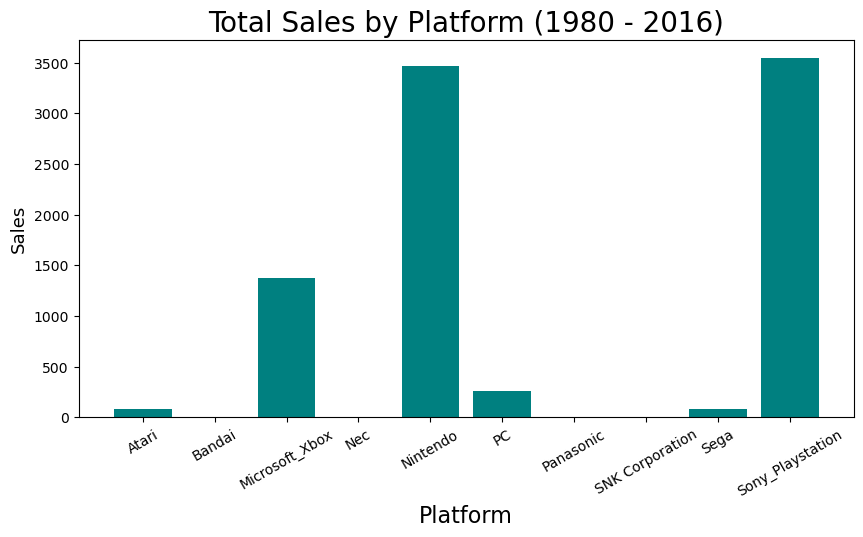

In [28]:
plt.figure(figsize=(10,5),dpi=100)
plt.bar(x=totalplatform['Platform_General'], height=totalplatform['Global_Sales'], color = 'teal')
plt.title("Total Sales by Platform (1980 - 2016)",size = 20)
plt.xlabel('Platform', size=16)
plt.ylabel("Sales",size=13)
plt.yticks(fontsize=10)
plt.xticks(rotation = 30, size=10)
plt.show()

In [29]:
totalplatform.nlargest(3, columns='Global_Sales')

,Platform_General,Global_Sales
9,Sony_Playstation,3549.83
4,Nintendo,3469.71
2,Microsoft_Xbox,1372.92


##### From 1980 until 2016, top three platform with most sales are:
- Sony Playstation: 3549.83 million copies
- Nintendo: 3469.71 million copies
- Microsoft XBOX: 1372.92 million copies

##### B. Highest game sales by Platform in the last 10 years

In [30]:
totalplatform10 = yearlysales.loc[2007:2016]
totalplatform10sum = pd.pivot_table(totalplatform10, values='Global_Sales', index=['Platform_General'], aggfunc=np.sum).reset_index()
totalplatform10sum

,Platform_General,Global_Sales
0,Microsoft_Xbox,1061.63
1,Nintendo,1634.41
2,PC,161.12
3,Sega,0.06
4,Sony_Playstation,1623.94


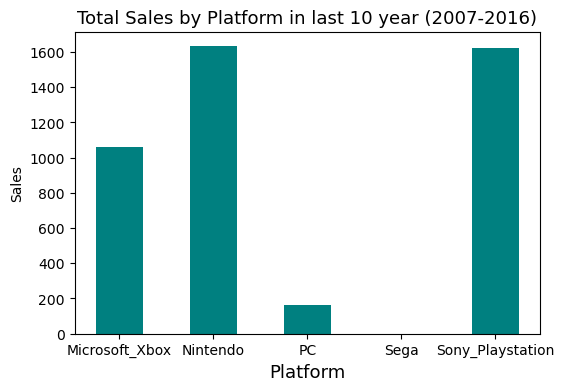

In [31]:
plt.figure(dpi=100)
plt.bar(x=totalplatform10sum['Platform_General'], height=totalplatform10sum['Global_Sales'], color = 'teal', width = 0.5)
plt.title("Total Sales by Platform in last 10 year (2007-2016)",size = 13)
plt.xlabel('Platform', size=13)
plt.ylabel("Sales",size=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

In [32]:
totalplatform10sum.nlargest(3, columns='Global_Sales')

,Platform_General,Global_Sales
1,Nintendo,1634.41
4,Sony_Playstation,1623.94
0,Microsoft_Xbox,1061.63


##### From 2007 until 2016, top three platform with most sales are:
- Nintendo: 1634.41 million copies
- Sony Playstation: 1623.94  million copies
- Microsoft XBOX: 1061.63 million copies


##### C. Highest game sales by Platform in the last 5 years

In [33]:
totalplatform5 = yearlysales.loc[2012:2016]
totalplatform5sum = pd.pivot_table(totalplatform5, values='Global_Sales', index=['Platform_General'], aggfunc=np.sum).reset_index()
totalplatform5sum

,Platform_General,Global_Sales
0,Microsoft_Xbox,395.92
1,Nintendo,324.89
2,PC,62.80
3,Sony_Playstation,663.13


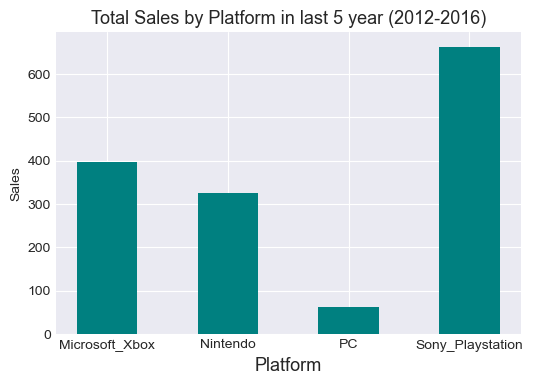

In [34]:
plt.style.use('seaborn-darkgrid')
plt.figure(dpi=100)
plt.bar(totalplatform5sum['Platform_General'], totalplatform5sum['Global_Sales'], color = 'teal', width=[0.5])
plt.title("Total Sales by Platform in last 5 year (2012-2016)",size = 13)
plt.xlabel('Platform', fontsize=13)
plt.ylabel("Sales",fontsize=10)
ynumber = np.random.randint(low=0, high=700, size=100)
plt.yticks(np.arange(0, max(ynumber), 100), fontsize=10)
plt.xticks(fontsize = 10)
plt.show()

In [35]:
totalplatform5sum.nlargest(3, columns='Global_Sales')

,Platform_General,Global_Sales
3,Sony_Playstation,663.13
0,Microsoft_Xbox,395.92
1,Nintendo,324.89


##### From 2012 until 2017, top three platform with most sales are:
- Sony Playstation: 663.13 million copies
- Microsoft XBOX: 395.92 million copies
- Nintendo: 324.89 million copies

#### 1.2 Highest game sales by Genre

##### A. Highest game sales by Genre all time sales

In [36]:
yearlygenre = pd.pivot_table(dfsalesc, values='Global_Sales', index=['Year_of_Release', 'Genre'], aggfunc=np.sum)
totalgenre = pd.pivot_table(yearlygenre, values='Global_Sales', index=['Genre'], aggfunc=np.sum).reset_index()
totalgenre

,Genre,Global_Sales
0,Action,1717.62
1,Adventure,233.46
2,Fighting,442.63
3,Misc,790.94
4,Platform,825.86
5,Puzzle,240.33
6,Racing,723.70
7,Role-Playing,930.85
8,Shooter,1041.83
9,Simulation,388.11


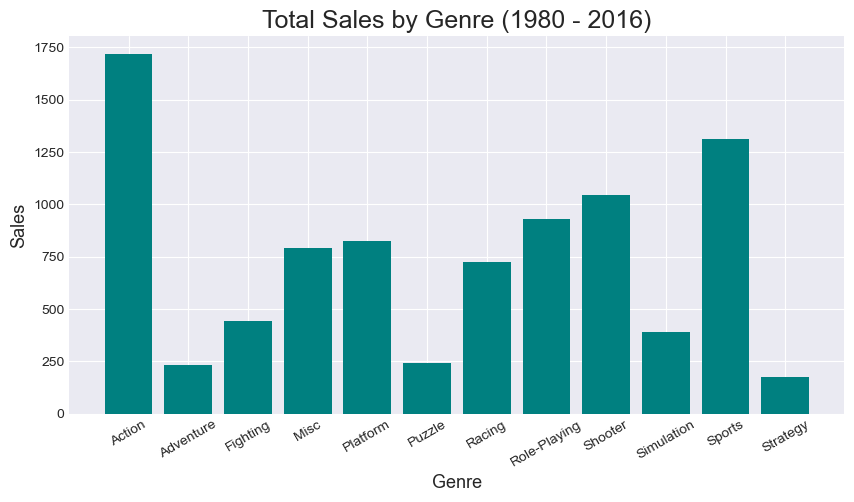

In [37]:
plt.figure(figsize=(10,5),dpi=100)
plt.bar(x=totalgenre['Genre'], height=totalgenre['Global_Sales'], color = 'teal')
plt.title("Total Sales by Genre (1980 - 2016)",size = 18)
plt.xlabel('Genre', size=13)
plt.ylabel("Sales",size=13)
plt.yticks(fontsize=10)
plt.xticks(rotation=30,size=10)
plt.show()

In [38]:
totalgenre.nlargest(3, columns='Global_Sales')

,Genre,Global_Sales
0,Action,1717.62
10,Sports,1310.39
8,Shooter,1041.83


##### From 1980 until 2016, top three genre with most sales are:
- Action: 1717.62 million copies
- Sports: 1310.39 million copies
- Shooter: 1041.83 million copies


##### B. Highest game sales by Genre in the last 10 years

In [39]:
totalgenre10 = yearlygenre.loc[2007:2016]
totalgenre10sum = pd.pivot_table(totalgenre10, values='Global_Sales', index=['Genre'], aggfunc=np.sum).reset_index()
totalgenre10sum

,Genre,Global_Sales
0,Action,1051.13
1,Adventure,130.08
2,Fighting,165.93
3,Misc,488.05
4,Platform,230.52
5,Puzzle,79.41
6,Racing,265.29
7,Role-Playing,464.87
8,Shooter,679.06
9,Simulation,199.32


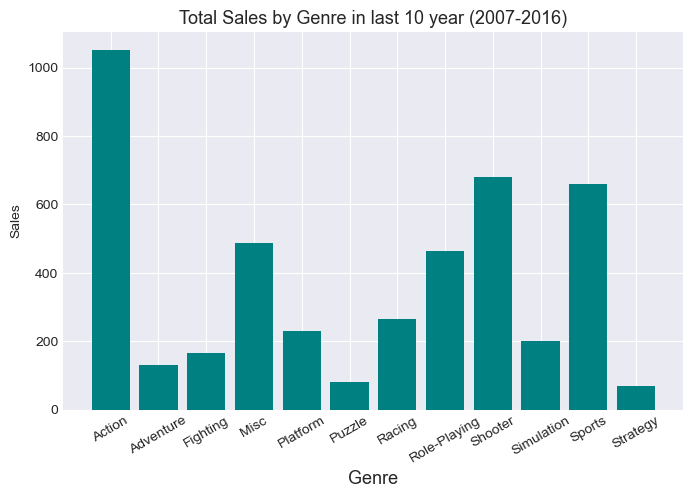

In [40]:
plt.figure(figsize=(8,5), dpi=100)
plt.bar(x=totalgenre10sum['Genre'], height=totalgenre10sum['Global_Sales'], color = 'teal')
plt.title("Total Sales by Genre in last 10 year (2007-2016)",size = 13)
plt.xlabel('Genre', size=13)
plt.ylabel("Sales",size=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=30,size=10)
plt.show()

In [41]:
totalgenre10sum.nlargest(3, columns='Global_Sales')

,Genre,Global_Sales
0,Action,1051.13
8,Shooter,679.06
10,Sports,658.38


##### From 2007 until 2016, top three genre with most sales are:
- Action: 1051.13 million copies
- Shooter: 679.06 million copies
- Sports : 658.38 million copies 

##### C. Highest game sales by Genre in the last 5 years

In [42]:
totalgenre5 = yearlygenre.loc[2012:2016]
totalgenre5sum = pd.pivot_table(totalgenre5, values='Global_Sales', index=['Genre'], aggfunc=np.sum).reset_index()
totalgenre5sum

,Genre,Global_Sales
0,Action,441.24
1,Adventure,29.46
2,Fighting,44.43
3,Misc,85.03
4,Platform,61.01
5,Puzzle,4.89
6,Racing,53.55
7,Role-Playing,192.68
8,Shooter,304.83
9,Simulation,35.10


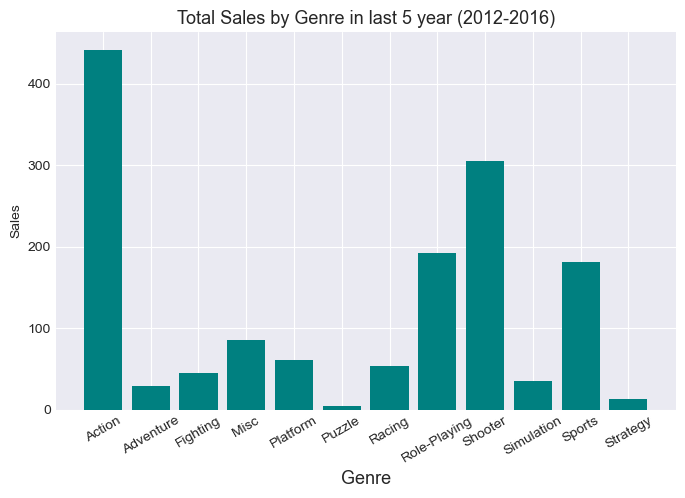

In [43]:
plt.figure(figsize=(8,5), dpi=100)
plt.bar(x=totalgenre5sum['Genre'], height=totalgenre5sum['Global_Sales'], color = 'teal')
plt.title("Total Sales by Genre in last 5 year (2012-2016)",size = 13)
plt.xlabel('Genre', size=13)
plt.ylabel("Sales",size=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=30,size=10)
plt.show()

In [44]:
totalgenre5sum.nlargest(3, columns='Global_Sales')

,Genre,Global_Sales
0,Action,441.24
8,Shooter,304.83
7,Role-Playing,192.68


##### From 2012 until 2016, top three genre with most sales are:
- Action: 441.24 million copies
- Shooter: 304.83 million copies
- Role-Playing: 192.68 million copies 

#### 1.3 Sales breakdown in most selling platform (Sony Playstation)

In [45]:
dfsony = dfsalesc.loc[dfsalesc['Platform_General'] == 'Sony_Playstation']
dfsony

,Name,Platform,Genre,Global_Sales,Year_of_Release,Platform_General
16,Grand Theft Auto V,PS3,Action,21.04,2013.0,Sony_Playstation
17,Grand Theft Auto: San Andreas,PS2,Action,20.81,2004.0,Sony_Playstation
24,Grand Theft Auto: Vice City,PS2,Action,16.15,2002.0,Sony_Playstation
28,Gran Turismo 3: A-Spec,PS2,Racing,14.98,2001.0,Sony_Playstation
31,Call of Duty: Black Ops 3,PS4,Shooter,14.63,2015.0,Sony_Playstation
...,...,...,...,...,...,...
16711,Aiyoku no Eustia,PSV,Misc,0.01,2014.0,Sony_Playstation
16713,SCORE International Baja 1000: The Official Game,PS2,Racing,0.01,2008.0,Sony_Playstation
16714,Samurai Warriors: Sanada Maru,PS3,Action,0.01,2016.0,Sony_Playstation
16716,Haitaka no Psychedelica,PSV,Adventure,0.01,2016.0,Sony_Playstation


##### A. Highest game sales by Genre in Sony Playstation all time sales

In [46]:
yearlygenresony = pd.pivot_table(dfsony, values='Global_Sales', index=['Year_of_Release', 'Genre'], aggfunc=np.sum)
yearlygenresony

Global_Sales
Year_of_Release Genre                     
1994.0          Adventure             0.06
                Fighting              1.38
                Racing                0.86
                Role-Playing          0.18
                Shooter               1.59
...                                    ...
2016.0          Role-Playing          7.59
                Shooter              24.19
                Simulation            0.55
                Sports               16.27
                Strategy              0.31

[270 rows x 1 columns]

In [47]:
yearlygenresony.nlargest(3, columns='Global_Sales')

,,Global_Sales
Year_of_Release,Genre,
2013.0,Action,60.21
2014.0,Action,58.09
2008.0,Action,57.00


In [48]:
totalgenresony = pd.pivot_table(yearlygenresony, values='Global_Sales', index=['Genre'], aggfunc=np.sum).reset_index()
totalgenresony

,Genre,Global_Sales
0,Action,871.36
1,Adventure,85.09
2,Fighting,245.96
3,Misc,214.83
4,Platform,192.90
5,Puzzle,24.15
6,Racing,377.39
7,Role-Playing,333.43
8,Shooter,451.91
9,Simulation,85.42


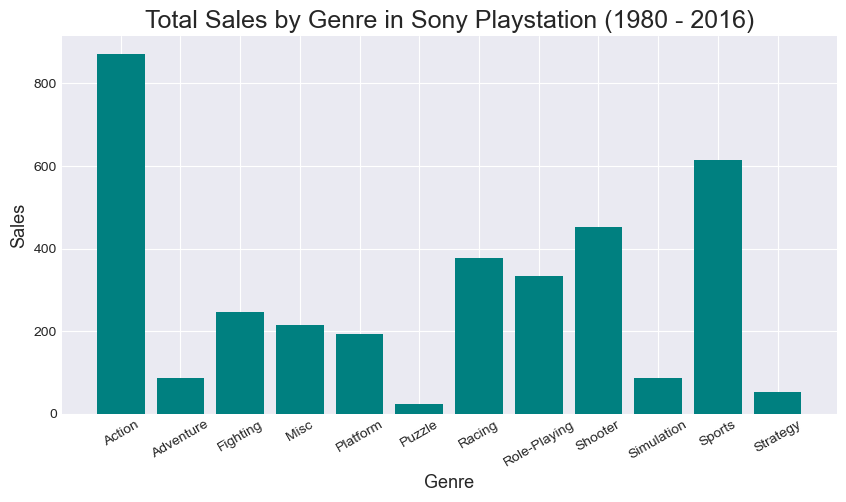

In [49]:
plt.figure(figsize=(10,5),dpi=100)
plt.bar(x=totalgenresony['Genre'], height=totalgenresony['Global_Sales'], color = 'teal')
plt.title("Total Sales by Genre in Sony Playstation (1980 - 2016)",size = 18)
plt.xlabel('Genre', size=13)
plt.ylabel("Sales",size=13)
plt.yticks(fontsize=10)
plt.xticks(rotation=30,size=10)
plt.show()

In [50]:
totalgenresony.nlargest(3, columns='Global_Sales')

,Genre,Global_Sales
0,Action,871.36
10,Sports,614.88
8,Shooter,451.91


##### From 1980 until 2016, top three genre with most sales are:
- Action: 871.36 million copies
- Sports: 614.88 million copies
- Shooter: 451.91 million copies 

##### B. Highest game sales by Genre in Sony Playstation in the last 10 years

In [51]:
totalgenresony10 = yearlygenresony.loc[2007:2016]
totalgenresony10sum = pd.pivot_table(totalgenresony10, values='Global_Sales', index=['Genre'], aggfunc=np.sum).reset_index()
totalgenresony10sum

,Genre,Global_Sales
0,Action,485.76
1,Adventure,45.20
2,Fighting,85.42
3,Misc,97.21
4,Platform,55.73
5,Puzzle,2.31
6,Racing,103.37
7,Role-Playing,163.34
8,Shooter,292.90
9,Simulation,20.46


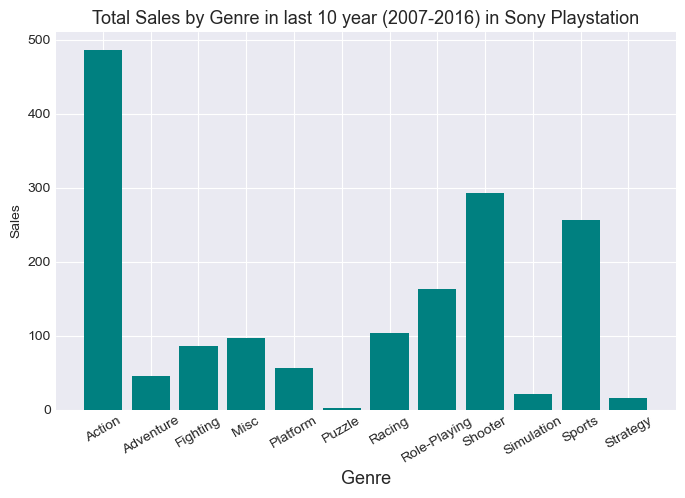

In [52]:
plt.figure(figsize=(8,5), dpi=100)
plt.bar(x=totalgenresony10sum['Genre'], height=totalgenresony10sum['Global_Sales'], color = 'teal')
plt.title("Total Sales by Genre in last 10 year (2007-2016) in Sony Playstation",size = 13)
plt.xlabel('Genre', size=13)
plt.ylabel("Sales",size=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=30,size=10)
plt.show()

In [53]:
totalgenresony10sum.nlargest(3, columns='Global_Sales')

,Genre,Global_Sales
0,Action,485.76
8,Shooter,292.90
10,Sports,256.61


##### From 2007 until 2016, top three platform with most sales are:
- Action: 485.76 million copies
- Shooter: 292.90 million copies
- Sports : 256.61 million copies 

##### C. Highest game sales by Genre in Sony Playstation in the last 5 years

In [54]:
totalgenresony5 = yearlygenresony.loc[2012:2016]
totalgenresony5sum = pd.pivot_table(totalgenresony5, values='Global_Sales', index=['Genre'], aggfunc=np.sum).reset_index()
totalgenresony5sum

,Genre,Global_Sales
0,Action,231.94
1,Adventure,17.91
2,Fighting,22.20
3,Misc,21.81
4,Platform,14.21
5,Puzzle,0.13
6,Racing,25.95
7,Role-Playing,66.27
8,Shooter,151.30
9,Simulation,3.10


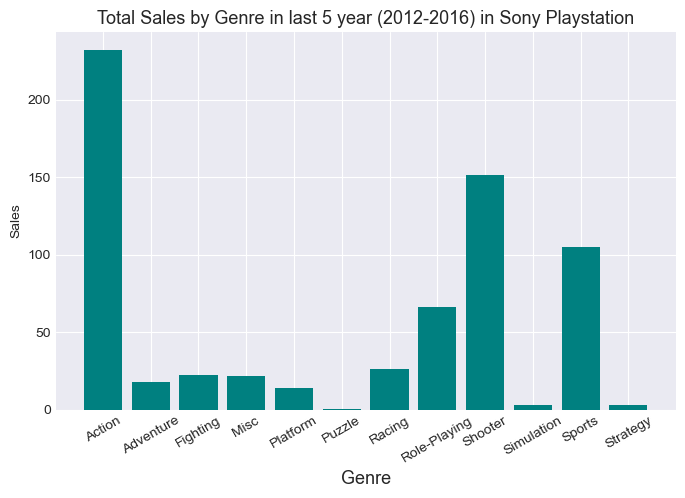

In [55]:
plt.figure(figsize=(8,5), dpi=100)
plt.bar(x=totalgenresony5sum['Genre'], height=totalgenresony5sum['Global_Sales'], color = 'teal')
plt.title("Total Sales by Genre in last 5 year (2012-2016) in Sony Playstation",size = 13)
plt.xlabel('Genre', size=13)
plt.ylabel("Sales",size=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=30,size=10)
plt.show()

In [56]:
totalgenresony5sum.nlargest(3, columns='Global_Sales')

,Genre,Global_Sales
0,Action,231.94
8,Shooter,151.30
10,Sports,105.07


##### From 2012 until 2016, top three platform with most sales are:
- Action: 231.94 million copies
- Shooter: 151.30 million copies
- Sports : 105.07 million copies 


###  part 2 : Sales and Score Correlation

In [57]:
#sales value with critic score
#In this part, I also use 2 approach to see the correlation between sales figures and score
# 1. Correlation between sales figure and critic score
# 2. Correlation between sales figure and user score

#### 2.1 Correlation between sales figure and critic score

In [58]:
#select the data needed and clean the data first
dfkritik = df[['Name', 'Platform', 'Genre', 'Global_Sales', 'Year_of_Release', 'Critic_Score']]
dfkritik.isna().sum()

Name                  2
Platform              0
Genre                 2
Global_Sales          0
Year_of_Release     269
Critic_Score       8582
dtype: int64

In [59]:
#drop the nan value

dfkritik = dfkritik.dropna()
dfkritik

,Name,Platform,Genre,Global_Sales,Year_of_Release,Critic_Score
0,Wii Sports,Wii,Sports,82.53,2006.0,76.0
2,Mario Kart Wii,Wii,Racing,35.52,2008.0,82.0
3,Wii Sports Resort,Wii,Sports,32.77,2009.0,80.0
6,New Super Mario Bros.,DS,Platform,29.80,2006.0,89.0
7,Wii Play,Wii,Misc,28.92,2006.0,58.0
...,...,...,...,...,...,...
16700,Breach,PC,Shooter,0.01,2011.0,61.0
16701,Bust-A-Move 3000,GC,Puzzle,0.01,2003.0,53.0
16702,Mega Brain Boost,DS,Puzzle,0.01,2008.0,48.0
16706,STORM: Frontline Nation,PC,Strategy,0.01,2011.0,60.0


In this dataset, there are multiple rows with same game title(name). It's because some games launched on multiple platform, and since I will compare each game with it's score I will group games with same name and sum up their sales figures.

In [126]:
dfgabung = pd.pivot_table(dfkritik, values=['Year_of_Release', 'Global_Sales', 'Critic_Score'], index=['Name'], aggfunc=np.sum)
dfgabung

,Critic_Score,Global_Sales,Year_of_Release
Name,,,
Tales of Xillia 2,71.0,0.84,2012.0
.hack//Infection Part 1,75.0,1.27,2002.0
.hack//Mutation Part 2,76.0,0.68,2002.0
.hack//Outbreak Part 3,70.0,0.46,2002.0
007 Racing,51.0,0.53,2000.0
...,...,...,...
inFAMOUS: Second Son,80.0,2.79,2014.0
nail'd,130.0,0.22,4020.0
pro evolution soccer 2011,387.0,4.09,10050.0


In [127]:
#since the number get sum, then we have to get the average number of it
ncritic = dfkritik['Name'].value_counts()
ncritic

Need for Speed: Most Wanted                8
Madden NFL 08                              8
LEGO Star Wars II: The Original Trilogy    8
Madden NFL 07                              8
Cars                                       8
                                          ..
Shenmue                                    1
Nicktoons: Freeze Frame Frenzy             1
Wii Party                                  1
Tony Hawk's Underground 2 Remix            1
Cy Girls                                   1
Name: Name, Length: 5031, dtype: int64

In [128]:
dfgabung['Critic_Score'] = dfgabung['Critic_Score'] / ncritic
dfgabung['Year_of_Release'] = dfgabung['Year_of_Release'] / ncritic
dfgabung['Year_of_Release'].round(0)
dfgabung

,Critic_Score,Global_Sales,Year_of_Release
Name,,,
Tales of Xillia 2,71.0,0.84,2012.0
.hack//Infection Part 1,75.0,1.27,2002.0
.hack//Mutation Part 2,76.0,0.68,2002.0
.hack//Outbreak Part 3,70.0,0.46,2002.0
007 Racing,51.0,0.53,2000.0
...,...,...,...
inFAMOUS: Second Son,80.0,2.79,2014.0
nail'd,65.0,0.22,2010.0
pro evolution soccer 2011,77.4,4.09,2010.0


In [129]:
#check nan value
dfgabung.isna().sum()

Critic_Score       0
Global_Sales       0
Year_of_Release    0
dtype: int64

In [130]:
dfgabungkorelasikritik = dfgabung.drop(['Year_of_Release'], axis =1)
dfgabungkorelasikritik.corr(method='pearson')

,Critic_Score,Global_Sales
Critic_Score,1.000000,0.261029
Global_Sales,0.261029,1.000000


In [65]:
dfgabungkorelasikritik.corr(method='spearman')

,Critic_Score,Global_Sales
Critic_Score,1.000000,0.385165
Global_Sales,0.385165,1.000000


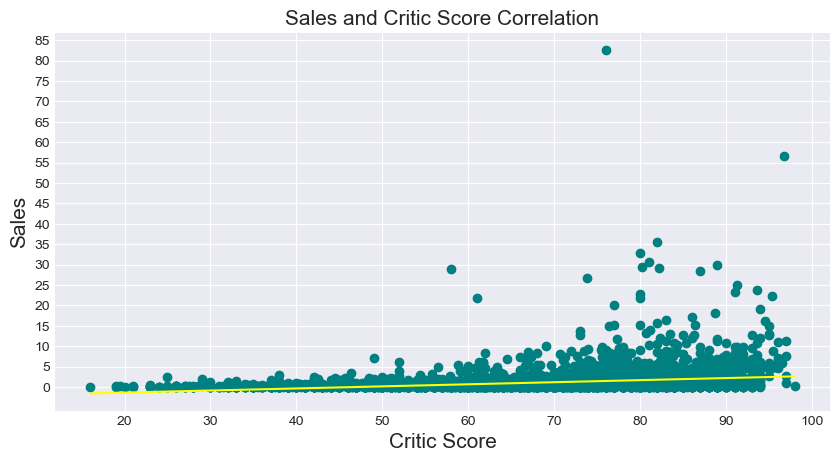

In [131]:
x=dfgabung['Critic_Score']
y=dfgabung['Global_Sales']
plt.figure(figsize=(10,5),dpi=100)
plt.scatter(x , y, color = 'teal')
plt.title("Sales and Critic Score Correlation",size = 15)
plt.xlabel('Critic Score', size=15)
plt.ylabel("Sales",size=15)
xnumber = np.random.randint(low=0, high=120, size=100)
ynumber = np.random.randint(low=0, high=100, size=100)
plt.yticks(np.arange(0, max(ynumber), 5), fontsize=10 )
plt.xticks(np.arange(0, max(xnumber), 10), size=10)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='yellow')
plt.show()

In [132]:
dfgabung.sort_values(by=['Critic_Score'], ascending=False)

,Critic_Score,Global_Sales,Year_of_Release
Name,,,
SoulCalibur,98.0,0.34,1999.0
NFL 2K1,97.0,1.09,2000.0
Super Mario Galaxy 2,97.0,7.51,2010.0
Metroid Prime,97.0,2.82,2002.0
Super Mario Galaxy,97.0,11.35,2007.0
...,...,...,...
Ninjabread Man,20.0,0.08,2007.0
Rugby 15,19.5,0.20,2015.0
Anubis II,19.0,0.07,2007.0


In [133]:
dfgabung.sort_values(by=['Global_Sales'], ascending=False)

,Critic_Score,Global_Sales,Year_of_Release
Name,,,
Wii Sports,76.0,82.53,2006.0
Grand Theft Auto V,96.8,56.57,2013.8
Mario Kart Wii,82.0,35.52,2008.0
Wii Sports Resort,80.0,32.77,2009.0
Call of Duty: Modern Warfare 3,81.0,30.59,2011.0
...,...,...,...
Rail Simulator,72.0,0.01,2007.0
Groovin' Blocks,75.0,0.01,2009.0
Monster Rancher Advance 2,79.0,0.01,2002.0


Critic score doesn’t really have an impact to games’ sales.

With critic score’s spearman correlation value by 0.3851, amd and critic score’s pearson correlation value by 0.261029

#### 2.2 Correlation between sales figure and user score

In [134]:
#select the data needed and clean the data first
dfuser = df[['Name', 'Platform', 'Genre', 'Global_Sales', 'Year_of_Release', 'User_Score' ]]
dfuser = dfuser.dropna()
dfuser

,Name,Platform,Genre,Global_Sales,Year_of_Release,User_Score
0,Wii Sports,Wii,Sports,82.53,2006.0,8
2,Mario Kart Wii,Wii,Racing,35.52,2008.0,8.3
3,Wii Sports Resort,Wii,Sports,32.77,2009.0,8
6,New Super Mario Bros.,DS,Platform,29.80,2006.0,8.5
7,Wii Play,Wii,Misc,28.92,2006.0,6.6
...,...,...,...,...,...,...
16702,Mega Brain Boost,DS,Puzzle,0.01,2008.0,tbd
16706,STORM: Frontline Nation,PC,Strategy,0.01,2011.0,7.2
16708,Plushees,DS,Simulation,0.01,2008.0,tbd
16709,15 Days,PC,Adventure,0.01,2009.0,5.8


In [135]:
dfuser['User_Score'].unique()

array(['8', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2',
       '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9',
       '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3', '7.6',
       '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [136]:
#in user score, there are some games that doesn't have score, but instead they left it empty, they fill it with 'tbd' (to be done), 
#so I have to manually drop it.


dfuser = dfuser[~dfuser['User_Score'].str.contains('tbd')]
dfuser['User_Score'].unique()

array(['8', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2',
       '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9',
       '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3', '7.6',
       '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1', '6.7',
       '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7', '4.1',
       '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1', '2.9',
       '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7', '2.2',
       '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6', '9.6',
       '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3', '0.5',
       '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [72]:
dfuser.dtypes

Name                object
Platform            object
Genre               object
Global_Sales       float64
Year_of_Release    float64
User_Score          object
dtype: object

In [137]:
#and the user score column's type is object/string, so to be able calculate it I have to convert it to float type
 
dfuser['User_Score'] = dfuser['User_Score'].astype('float64')

<ipython-input-137-ef2dd81e634e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfuser['User_Score'] = dfuser['User_Score'].astype('float64')


In [138]:
dfuser.dtypes

Name                object
Platform            object
Genre               object
Global_Sales       float64
Year_of_Release    float64
User_Score         float64
dtype: object

In [139]:
Q3kritikuser = dfuser.describe()['User_Score']['75%']
Q1kritikuser = dfuser.describe()['User_Score']['25%']
IQRkritikuser = Q3kritikuser - Q1kritikuser
Upper_Fencekritikuser = Q3kritikuser + (1.5 * IQRkritikuser)
Lower_Fencekritikuser = Q1kritikuser - (1.5 * IQRkritikuser)
outlierkritikuser = dfuser[(dfuser['User_Score'] < Lower_Fencekritikuser) | (dfuser['User_Score'] > Upper_Fencekritikuser)]
outlierkritikuser.sort_values(by=['User_Score'], ascending=False)

,Name,Platform,Genre,Global_Sales,Year_of_Release,User_Score
8222,Ridge Racer,PSV,Racing,0.17,2011.0,3.7
15409,Pro Evolution Soccer 2017,PC,Sports,0.02,2016.0,3.7
6593,One Piece: Pirate Warriors 3,PS3,Action,0.25,2015.0,3.7
9499,"Crouching Tiger, Hidden Dragon",PS2,Action,0.13,2003.0,3.7
9356,Retro Atari Classics,DS,Misc,0.13,2005.0,3.7
...,...,...,...,...,...,...
13381,Billy the Wizard: Rocket Broomstick Racing,Wii,Racing,0.05,2007.0,0.3
5764,Happy Feet,DS,Action,0.31,2006.0,0.3
9971,Madden NFL 17,PS3,Sports,0.12,2016.0,0.2
13683,Myth Makers: Trixie in Toyland,Wii,Platform,0.04,2008.0,0.2


In [140]:
dfuser.sort_values(by=['User_Score'], ascending=False)

,Name,Platform,Genre,Global_Sales,Year_of_Release,User_Score
14414,Breath of Fire III,PSP,Role-Playing,0.03,2005.0,9.7
8976,Boktai: The Sun is in Your Hand,GBA,Role-Playing,0.15,2003.0,9.6
3417,Harvest Moon: Friends of Mineral Town,GBA,Simulation,0.59,2003.0,9.6
10106,Cory in the House,DS,Action,0.11,2007.0,9.5
1645,Golden Sun: The Lost Age,GBA,Role-Playing,1.22,2002.0,9.5
...,...,...,...,...,...,...
13381,Billy the Wizard: Rocket Broomstick Racing,Wii,Racing,0.05,2007.0,0.3
5764,Happy Feet,DS,Action,0.31,2006.0,0.3
9971,Madden NFL 17,PS3,Sports,0.12,2016.0,0.2
13683,Myth Makers: Trixie in Toyland,Wii,Platform,0.04,2008.0,0.2


there are also some outliers data from User Score column, but from 299 values they all still a normal value for a score so I decided to keep them.

In [141]:
#same as the first one, I combine games with same name.

dfgabunguser = pd.pivot_table(dfuser, values=['Year_of_Release', 'Global_Sales', 'User_Score'], index=['Name'], aggfunc=np.sum)
dfgabunguser

,Global_Sales,User_Score,Year_of_Release
Name,,,
Tales of Xillia 2,0.84,7.9,2012.0
.hack//Infection Part 1,1.27,8.5,2002.0
.hack//Mutation Part 2,0.68,8.9,2002.0
.hack//Outbreak Part 3,0.46,8.7,2002.0
007 Racing,0.53,4.6,2000.0
...,...,...,...
inFAMOUS 2,1.82,8.4,2011.0
inFAMOUS: Second Son,2.79,7.9,2014.0
nail'd,0.22,13.3,4020.0


In [142]:
nuser = dfuser['Name'].value_counts()
nuser

Need for Speed: Most Wanted                9
Angry Birds Star Wars                      8
FIFA 14                                    8
Madden NFL 07                              8
Terraria                                   8
                                          ..
Fast Racing Neo                            1
Knights of Honor                           1
Victorious Boxers: Ippo's Road to Glory    1
Robinson: The Journey                      1
Cy Girls                                   1
Name: Name, Length: 4650, dtype: int64

In [143]:
dfgabunguser['User_Score'] = (dfgabunguser['User_Score'] / nuser) * 10
dfgabunguser['Year_of_Release'] = dfgabunguser['Year_of_Release'] / nuser
dfgabunguser['Year_of_Release'].round(0)
dfgabunguser

,Global_Sales,User_Score,Year_of_Release
Name,,,
Tales of Xillia 2,0.84,79.0,2012.0
.hack//Infection Part 1,1.27,85.0,2002.0
.hack//Mutation Part 2,0.68,89.0,2002.0
.hack//Outbreak Part 3,0.46,87.0,2002.0
007 Racing,0.53,46.0,2000.0
...,...,...,...
inFAMOUS 2,1.82,84.0,2011.0
inFAMOUS: Second Son,2.79,79.0,2014.0
nail'd,0.22,66.5,2010.0


In [144]:
dfgabunguser.isna().sum()

Global_Sales       0
User_Score         0
Year_of_Release    0
dtype: int64

In [145]:
dfgabungkorelasiuser = dfgabunguser.drop(['Year_of_Release'], axis =1)
dfgabungkorelasiuser.corr(method='pearson')

,Global_Sales,User_Score
Global_Sales,1.000000,0.045274
User_Score,0.045274,1.000000


In [146]:
dfgabungkorelasiuser.corr(method='spearman')

,Global_Sales,User_Score
Global_Sales,1.000000,0.103986
User_Score,0.103986,1.000000


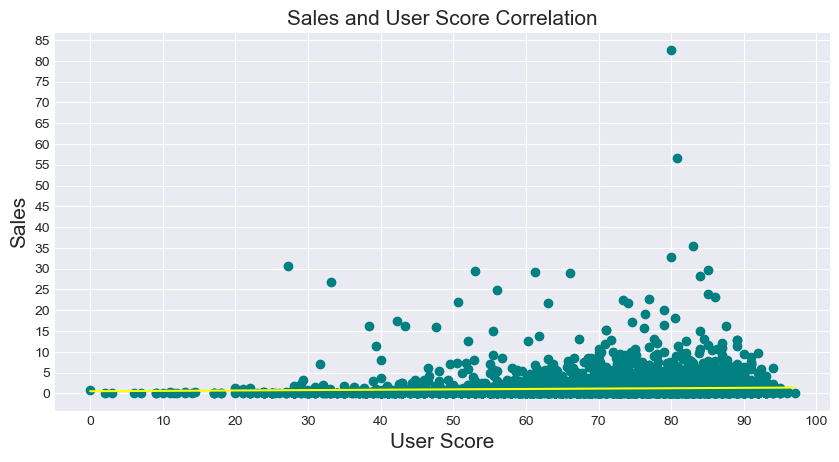

In [147]:
x=dfgabunguser['User_Score']
y=dfgabunguser['Global_Sales']
plt.figure(figsize=(10,5),dpi=100)
plt.scatter(x , y, color = 'teal')
plt.title("Sales and User Score Correlation",size = 15)
plt.xlabel('User Score', size=15)
plt.ylabel("Sales",size=15)
xnumber = np.random.randint(low=0, high=120, size=100)
ynumber = np.random.randint(low=0, high=100, size=100)
plt.yticks(np.arange(0, max(ynumber), 5), fontsize=10 )
plt.xticks(np.arange(0, max(xnumber), 10), size=10)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='yellow')
plt.show()

In [148]:
dfgabunguser.sort_values(by=['User_Score'], ascending=False)

,Global_Sales,User_Score,Year_of_Release
Name,,,
Breath of Fire III,0.03,97.0,2005.0
Harvest Moon: Friends of Mineral Town,0.59,96.0,2003.0
Boktai: The Sun is in Your Hand,0.15,96.0,2003.0
Karnaaj Rally,0.01,95.0,2003.0
Cory in the House,0.11,95.0,2007.0
...,...,...,...
Pool Party,0.05,7.0,2007.0
Kawasaki Jet Ski,0.02,6.0,2008.0
Billy the Wizard: Rocket Broomstick Racing,0.05,3.0,2007.0


In [149]:
dfgabunguser.sort_values(by=['Global_Sales'], ascending=False)

,Global_Sales,User_Score,Year_of_Release
Name,,,
Wii Sports,82.53,80.00,2006.0
Grand Theft Auto V,56.57,80.80,2013.8
Mario Kart Wii,35.52,83.00,2008.0
Wii Sports Resort,32.77,80.00,2009.0
Call of Duty: Modern Warfare 3,30.59,27.25,2011.0
...,...,...,...
Breach,0.01,58.00,2011.0
Grand Prix Legends,0.01,75.00,1997.0
STORM: Frontline Nation,0.01,72.00,2011.0


User score doesn’t really have an impact to games’ sales.

With user score’s spearman correlation value by 0.103986, amd and user score’s pearson correlation value by 0.045274

#### 2.3 Correlation between sales figure and user score in top sales genre (Action)

In [150]:
dfkritikaction = dfkritik.loc[dfkritik['Genre'] == 'Action']
dfkritikaction

,Name,Platform,Genre,Global_Sales,Year_of_Release,Critic_Score
16,Grand Theft Auto V,PS3,Action,21.04,2013.0,97.0
17,Grand Theft Auto: San Andreas,PS2,Action,20.81,2004.0,95.0
23,Grand Theft Auto V,X360,Action,16.27,2013.0,97.0
24,Grand Theft Auto: Vice City,PS2,Action,16.15,2002.0,95.0
38,Grand Theft Auto III,PS2,Action,13.10,2001.0,97.0
...,...,...,...,...,...,...
16656,Fast Racing Neo,WiiU,Action,0.01,2016.0,81.0
16664,Prison Architect,XOne,Action,0.01,2016.0,74.0
16667,E.T. The Extra-Terrestrial,GBA,Action,0.01,2001.0,46.0
16696,Metal Gear Solid V: Ground Zeroes,PC,Action,0.01,2014.0,80.0


In [102]:
dfkritikactiongabung = pd.pivot_table(dfkritikaction, values=['Year_of_Release', 'Global_Sales', 'Critic_Score'], index=['Name'], aggfunc=np.sum)
dfkritikactiongabung

,Critic_Score,Global_Sales,Year_of_Release
Name,,,
007: Quantum of Solace,319.0,3.43,10040.0
007: The World is not Enough,61.0,0.92,2000.0
300: March to Glory,55.0,0.41,2007.0
50 Cent: Bulletproof,97.0,2.21,4010.0
7 Days to Die,80.0,0.19,4032.0
...,...,...,...
[Prototype 2],229.0,1.64,6036.0
[Prototype],157.0,2.55,4018.0
inFAMOUS,85.0,2.93,2009.0


In [103]:
ncriticaction = dfkritikaction['Name'].value_counts()

In [104]:
dfkritikactiongabung['Critic_Score'] = dfkritikactiongabung['Critic_Score'] / ncriticaction
dfkritikactiongabung['Year_of_Release'] = dfkritikactiongabung['Year_of_Release'] / ncriticaction
dfkritikactiongabung['Year_of_Release'].round(0)
dfkritikactiongabung

,Critic_Score,Global_Sales,Year_of_Release
Name,,,
007: Quantum of Solace,63.800000,3.43,2008.0
007: The World is not Enough,61.000000,0.92,2000.0
300: March to Glory,55.000000,0.41,2007.0
50 Cent: Bulletproof,48.500000,2.21,2005.0
7 Days to Die,40.000000,0.19,2016.0
...,...,...,...
[Prototype 2],76.333333,1.64,2012.0
[Prototype],78.500000,2.55,2009.0
inFAMOUS,85.000000,2.93,2009.0


In [105]:
dfgabungactionkorelasikritik = dfkritikactiongabung.drop(['Year_of_Release'], axis =1)
dfgabungactionkorelasikritik.corr(method='pearson')

,Critic_Score,Global_Sales
Critic_Score,1.00000,0.35588
Global_Sales,0.35588,1.00000


In [106]:
dfgabungactionkorelasikritik.corr(method='spearman')

,Critic_Score,Global_Sales
Critic_Score,1.00000,0.43825
Global_Sales,0.43825,1.00000


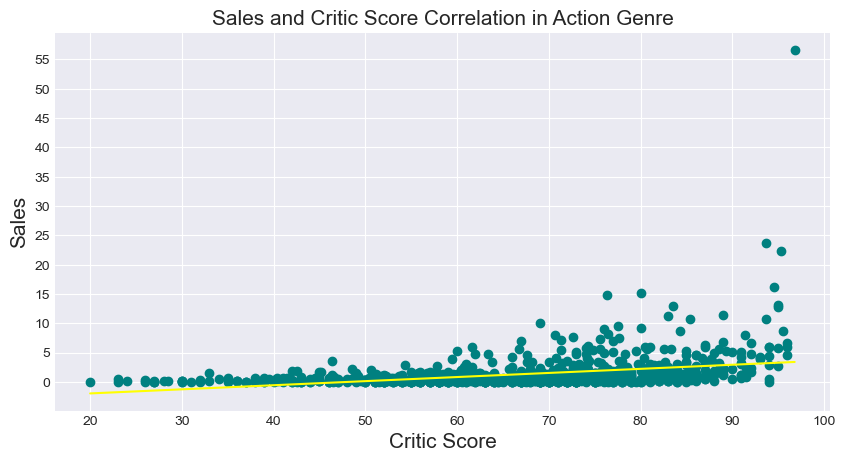

In [107]:
x=dfkritikactiongabung['Critic_Score']
y=dfkritikactiongabung['Global_Sales']
plt.figure(figsize=(10,5),dpi=100)
plt.scatter(x , y, color = 'teal')
plt.title("Sales and Critic Score Correlation in Action Genre",size = 15)
plt.xlabel('Critic Score', size=15)
plt.ylabel("Sales",size=15)
xnumber = np.random.randint(low=0, high=120, size=100)
ynumber = np.random.randint(low=0, high=100, size=100)
plt.yticks(np.arange(0, max(ynumber), 5), fontsize=10 )
plt.xticks(np.arange(0, max(xnumber), 10), size=10)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='yellow')
plt.show()

In [125]:
dfkritikactiongabung.sort_values(by=['Critic_Score'], ascending=False).round()

,Critic_Score,Global_Sales,Year_of_Release
Name,,,
Grand Theft Auto V,97.0,57.0,2014.0
The Legend of Zelda: The Wind Waker,96.0,5.0,2002.0
Uncharted 2: Among Thieves,96.0,7.0,2009.0
Metal Gear Solid 2: Sons of Liberty,96.0,6.0,2001.0
The Legend of Zelda: Twilight Princess,96.0,9.0,2006.0
...,...,...,...
KISS Pinball,26.0,0.0,2001.0
Game Party: Champions,24.0,0.0,2012.0
Charlie's Angels,23.0,0.0,2003.0


In [152]:
dfkritikactiongabung.sort_values(by=['Global_Sales'], ascending=False).round(2)

,Critic_Score,Global_Sales,Year_of_Release
Name,,,
Grand Theft Auto V,96.80,56.57,2013.80
Grand Theft Auto: San Andreas,93.67,23.73,2004.67
Grand Theft Auto IV,95.33,22.39,2008.00
Grand Theft Auto: Vice City,94.50,16.19,2002.50
LEGO Star Wars: The Complete Saga,80.00,15.26,2007.00
...,...,...,...
Dokuro,76.00,0.01,2012.00
Blackthorne,67.00,0.01,2003.00
Republique,72.00,0.01,2016.00


In genre 'Action', critic score has better impact to games’ sales.

With user score’s spearman correlation value by 0.43825, amd and user score’s pearson correlation value by 0.35588

In [166]:
dfuseraction = dfuser.loc[dfuser['Genre'] == 'Action']
dfuseraction

,Name,Platform,Genre,Global_Sales,Year_of_Release,User_Score
16,Grand Theft Auto V,PS3,Action,21.04,2013.0,8.2
17,Grand Theft Auto: San Andreas,PS2,Action,20.81,2004.0,9.0
23,Grand Theft Auto V,X360,Action,16.27,2013.0,8.1
24,Grand Theft Auto: Vice City,PS2,Action,16.15,2002.0,8.7
38,Grand Theft Auto III,PS2,Action,13.10,2001.0,8.5
...,...,...,...,...,...,...
16656,Fast Racing Neo,WiiU,Action,0.01,2016.0,8.5
16658,Ben 10 Omniverse 2,X360,Action,0.01,2013.0,5.1
16664,Prison Architect,XOne,Action,0.01,2016.0,6.7
16667,E.T. The Extra-Terrestrial,GBA,Action,0.01,2001.0,2.4


In [167]:
dfuseractiongabung = pd.pivot_table(dfuseraction, values=['Year_of_Release', 'Global_Sales', 'User_Score'], index=['Name'], aggfunc=np.sum)
dfuseractiongabung

,Global_Sales,User_Score,Year_of_Release
Name,,,
007: Quantum of Solace,3.30,27.5,8032.0
007: The World is not Enough,0.92,6.7,2000.0
300: March to Glory,0.41,7.1,2007.0
50 Cent: Bulletproof,2.21,12.5,4010.0
7 Days to Die,0.19,11.1,4032.0
...,...,...,...
[Prototype 2],1.64,20.2,6036.0
[Prototype],2.55,15.5,4018.0
inFAMOUS,2.93,8.3,2009.0


In [168]:
nuseraction = dfuseraction['Name'].value_counts()

In [169]:
dfuseractiongabung['User_Score'] = (dfuseractiongabung['User_Score'] / nuseraction) *10
dfuseractiongabung['Year_of_Release'] = dfuseractiongabung['Year_of_Release'] / nuseraction
dfuseractiongabung['Year_of_Release'].round(0)
dfuseractiongabung

,Global_Sales,User_Score,Year_of_Release
Name,,,
007: Quantum of Solace,3.30,68.750000,2008.0
007: The World is not Enough,0.92,67.000000,2000.0
300: March to Glory,0.41,71.000000,2007.0
50 Cent: Bulletproof,2.21,62.500000,2005.0
7 Days to Die,0.19,55.500000,2016.0
...,...,...,...
[Prototype 2],1.64,67.333333,2012.0
[Prototype],2.55,77.500000,2009.0
inFAMOUS,2.93,83.000000,2009.0


In [170]:
dfgabungactionkorelasiuser = dfuseractiongabung.drop(['Year_of_Release'], axis =1)
dfgabungactionkorelasiuser.corr(method='pearson')

,Global_Sales,User_Score
Global_Sales,1.00000,0.11677
User_Score,0.11677,1.00000


In [171]:
dfgabungactionkorelasiuser.corr(method='spearman')

,Global_Sales,User_Score
Global_Sales,1.000000,0.156846
User_Score,0.156846,1.000000


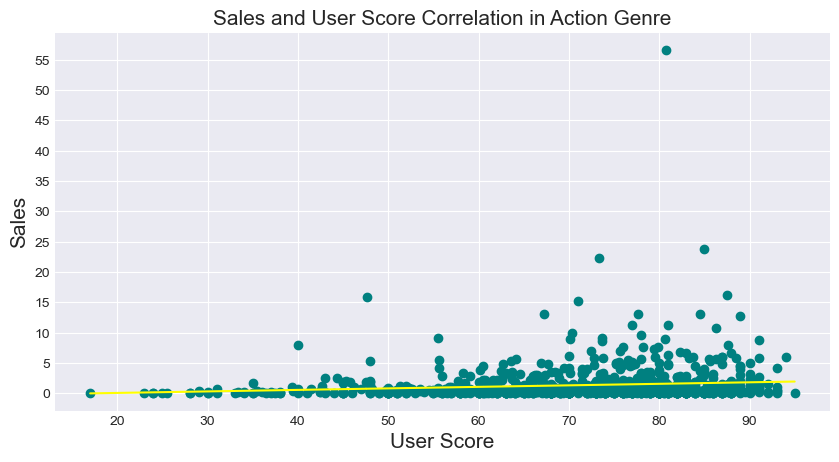

In [162]:
x=dfuseractiongabung['User_Score']
y=dfuseractiongabung['Global_Sales']
plt.figure(figsize=(10,5),dpi=100)
plt.scatter(x , y, color = 'teal')
plt.title("Sales and User Score Correlation in Action Genre",size = 15)
plt.xlabel('User Score', size=15)
plt.ylabel("Sales",size=15)
xnumber = np.random.randint(low=0, high=120, size=100)
ynumber = np.random.randint(low=0, high=100, size=100)
plt.yticks(np.arange(0, max(ynumber), 5), fontsize=10 )
plt.xticks(np.arange(0, max(xnumber), 10), size=10)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='yellow')
plt.show()

In [163]:
dfuseractiongabung.sort_values(by=['User_Score'], ascending=False)

,Global_Sales,User_Score,Year_of_Release
Name,,,
Cory in the House,0.11,95.0,2007.0
Metal Gear Solid,6.03,94.0,1998.0
Metal Gear Solid 3: Snake Eater,4.23,93.0,2004.0
Jet Grind Radio,0.03,93.0,2003.0
Hamtaro: Ham-Ham Heartbreak,0.36,93.0,2002.0
...,...,...,...
Kabuki Warriors,0.06,25.0,2001.0
Tenkai Knights: Brave Battle,0.02,24.0,2014.0
E.T. The Extra-Terrestrial,0.01,24.0,2001.0


In [165]:
dfuseractiongabung.sort_values(by=['Global_Sales'], ascending=False).round(2)

,Global_Sales,User_Score,Year_of_Release
Name,,,
Grand Theft Auto V,56.57,80.80,2013.8
Grand Theft Auto: San Andreas,23.84,85.00,2005.5
Grand Theft Auto IV,22.39,73.33,2008.0
Grand Theft Auto: Vice City,16.19,87.50,2002.5
FIFA Soccer 13,15.96,47.63,2012.0
...,...,...,...
Trine,0.01,82.00,2009.0
Republique,0.01,58.00,2016.0
Azure Striker Gunvolt,0.01,84.00,2016.0


In genre 'Action', user score has least impact to games’ sales.

With user score’s spearman correlation value by 0.156846, amd and user score’s pearson correlation value by 0.0.11677

# Conclusion and Recommendation

# Conclusion:
- Platform that has highest game sales is ‘Sony Playstation’ with sales figures of 3549.83 million copies from total 8818.57 million copies or about 42.34%. ‘Sony Playstation’ is also has the best results in the last five years (about 40.25%).
- ‘Nintendo’ in second place only less 80,12 million copies or about 0.95% and also has highest sales figures in last 10 years, but they fell off to third place in the last 5 years with 324.89 million copies with Sony Playsation at first place (663.13 million copies) and Xbox at second place (395.92 million copies)

- Top Game Sales by Genre is dominated by ‘Action’ with sales figures of 1717.62 about (about 19.5%)by ‘Action’ also has good trend in the last 10 and 5 years that it still at the first place.
- At second place is ‘Sport’, but in the last five and ten years, ‘Shooter’ crawling up to second place with 679.06 million copies and 304.83 million copies respectively.

- In highest sales platform, Sony Playstation, the genre that has highest sales figure is also dominated by ‘Action’, followed by Sports and Shooter respectively, but in the last five and ten years, Sports is replaced by Shooter at second place.


- Critic score has bigger impact to sales figures than User score, but both critic score and user score doesn’t really have an impact to games’ sales: - Critic score’s correlation value only by 0.3851 in spearman and 0.261 in pearson, - User score’s correlation value by 0.1039 in spearman and 0.0453 in pearson
- in 'Action' genre, both critic score and user score have better impact: Critic score by spearman = 0.4383 in and 0.3559 in pearson - User score by spearman = 0.1568 in and 0.1168 in pearson.

## Recommendation:
- To create highest sales figures as much as possible, the recommendation is to make a game that has ‘Action’ genre and if has to be exclusively on one platform, it is on Sony Playstation.
- Critic scores and User scores don’t have great impact on sales figure, but they are still have positive impact especially in 'Action' genre, so the company should be still pay attention to what criteria that both Critics and Users like from the game.

## Simulation:

In [103]:
dfkritikactiongabung.describe()

,Critic_Score,Global_Sales,Year_of_Release
count,972.000000,972.000000,972.000000
mean,66.138493,1.287716,2007.701710
std,14.512570,2.848098,4.418686
min,20.000000,0.010000,1996.000000
25%,56.729167,0.140000,2004.000000
50%,67.633333,0.430000,2008.000000
75%,76.333333,1.280000,2011.000000
max,96.800000,56.570000,2016.000000


In [104]:
#game with critic score higher than average
dfkritik7 = dfkritikactiongabung[dfkritikactiongabung['Critic_Score'] > 66]
dfkritik7

,Critic_Score,Global_Sales,Year_of_Release
Name,,,
Ace Combat: Assault Horizon,77.500000,1.23,2011.0
Advent Rising,68.000000,0.13,2005.0
Aeon Flux,67.500000,0.05,2005.0
Alan Wake,83.000000,1.39,2011.0
Aliens: Infestation,76.000000,0.16,2011.0
...,...,...,...
[Prototype 2],76.333333,1.64,2012.0
[Prototype],78.500000,2.55,2009.0
inFAMOUS,85.000000,2.93,2009.0


In [105]:
dfkritik7.describe()

,Critic_Score,Global_Sales,Year_of_Release
count,513.000000,513.000000,513.000000
mean,77.237578,1.972086,2008.062012
std,7.431222,3.725887,4.749490
min,66.200000,0.010000,1996.000000
25%,71.285714,0.240000,2004.000000
50%,75.666667,0.810000,2008.000000
75%,82.500000,2.180000,2012.000000
max,96.800000,56.570000,2016.000000


In [106]:
dfuseractiongabung.describe()

,Global_Sales,User_Score,Year_of_Release
count,917.000000,917.000000,917.000000
mean,1.378866,71.438713,2008.022984
std,2.954234,13.783350,4.462451
min,0.010000,17.000000,1996.000000
25%,0.150000,64.000000,2005.000000
50%,0.490000,74.000000,2008.000000
75%,1.400000,81.666667,2012.000000
max,56.570000,95.000000,2016.000000


In [107]:
dfuser7 = dfuseractiongabung[dfuseractiongabung['User_Score'] > 71]
dfuser7

,Global_Sales,User_Score,Year_of_Release
Name,,,
Advent Rising,0.13,75.0,2005.0
Aegis of Earth: Protonovus Assault,0.06,80.5,2016.0
Alan Wake,1.39,80.5,2011.0
Aliens: Infestation,0.16,82.0,2011.0
Anarchy Reigns,0.37,80.5,2012.0
...,...,...,...
ZombiU,1.01,77.0,2012.0
[Prototype],2.55,77.5,2009.0
inFAMOUS,2.93,83.0,2009.0


In [108]:
dfuser7.describe()

,Global_Sales,User_Score,Year_of_Release
count,544.000000,544.000000,544.000000
mean,1.627647,80.490273,2007.385294
std,3.483813,5.529304,4.503641
min,0.010000,71.200000,1996.000000
25%,0.197500,76.000000,2004.000000
50%,0.560000,80.000000,2007.000000
75%,1.592500,84.812500,2011.000000
max,56.570000,95.000000,2016.000000


If the company decided to create a game with 'Action' genre, the probability to has higher sales figures is better with good critic score:
- Average sales 1.9721 million copies more than average all sales without minding the critic score (1.2877) or more than 50% sales figures.

If the company decided to create a game with 'Action' genre, the probability to has higher sales figures is also better with good user score:
- Average sales 1.6276 million copies more than average all sales without minding the user score (1.3789) or more than 18% sales figures 